In [4]:
import pandas as pd
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.optimize import curve_fit


from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif' 
rcParams['figure.figsize'] = (10, 7)
rcParams['figure.dpi'] = 300
rcParams['axes.grid'] = True
rcParams['font.size'] = 14
# rcParamsmy-table

In [5]:
exp_1 = pd.read_csv("exp_1.csv")

-0.8373493392599715 + 0.1446389956751562·x¹
[ 0.144639   -0.83734934]


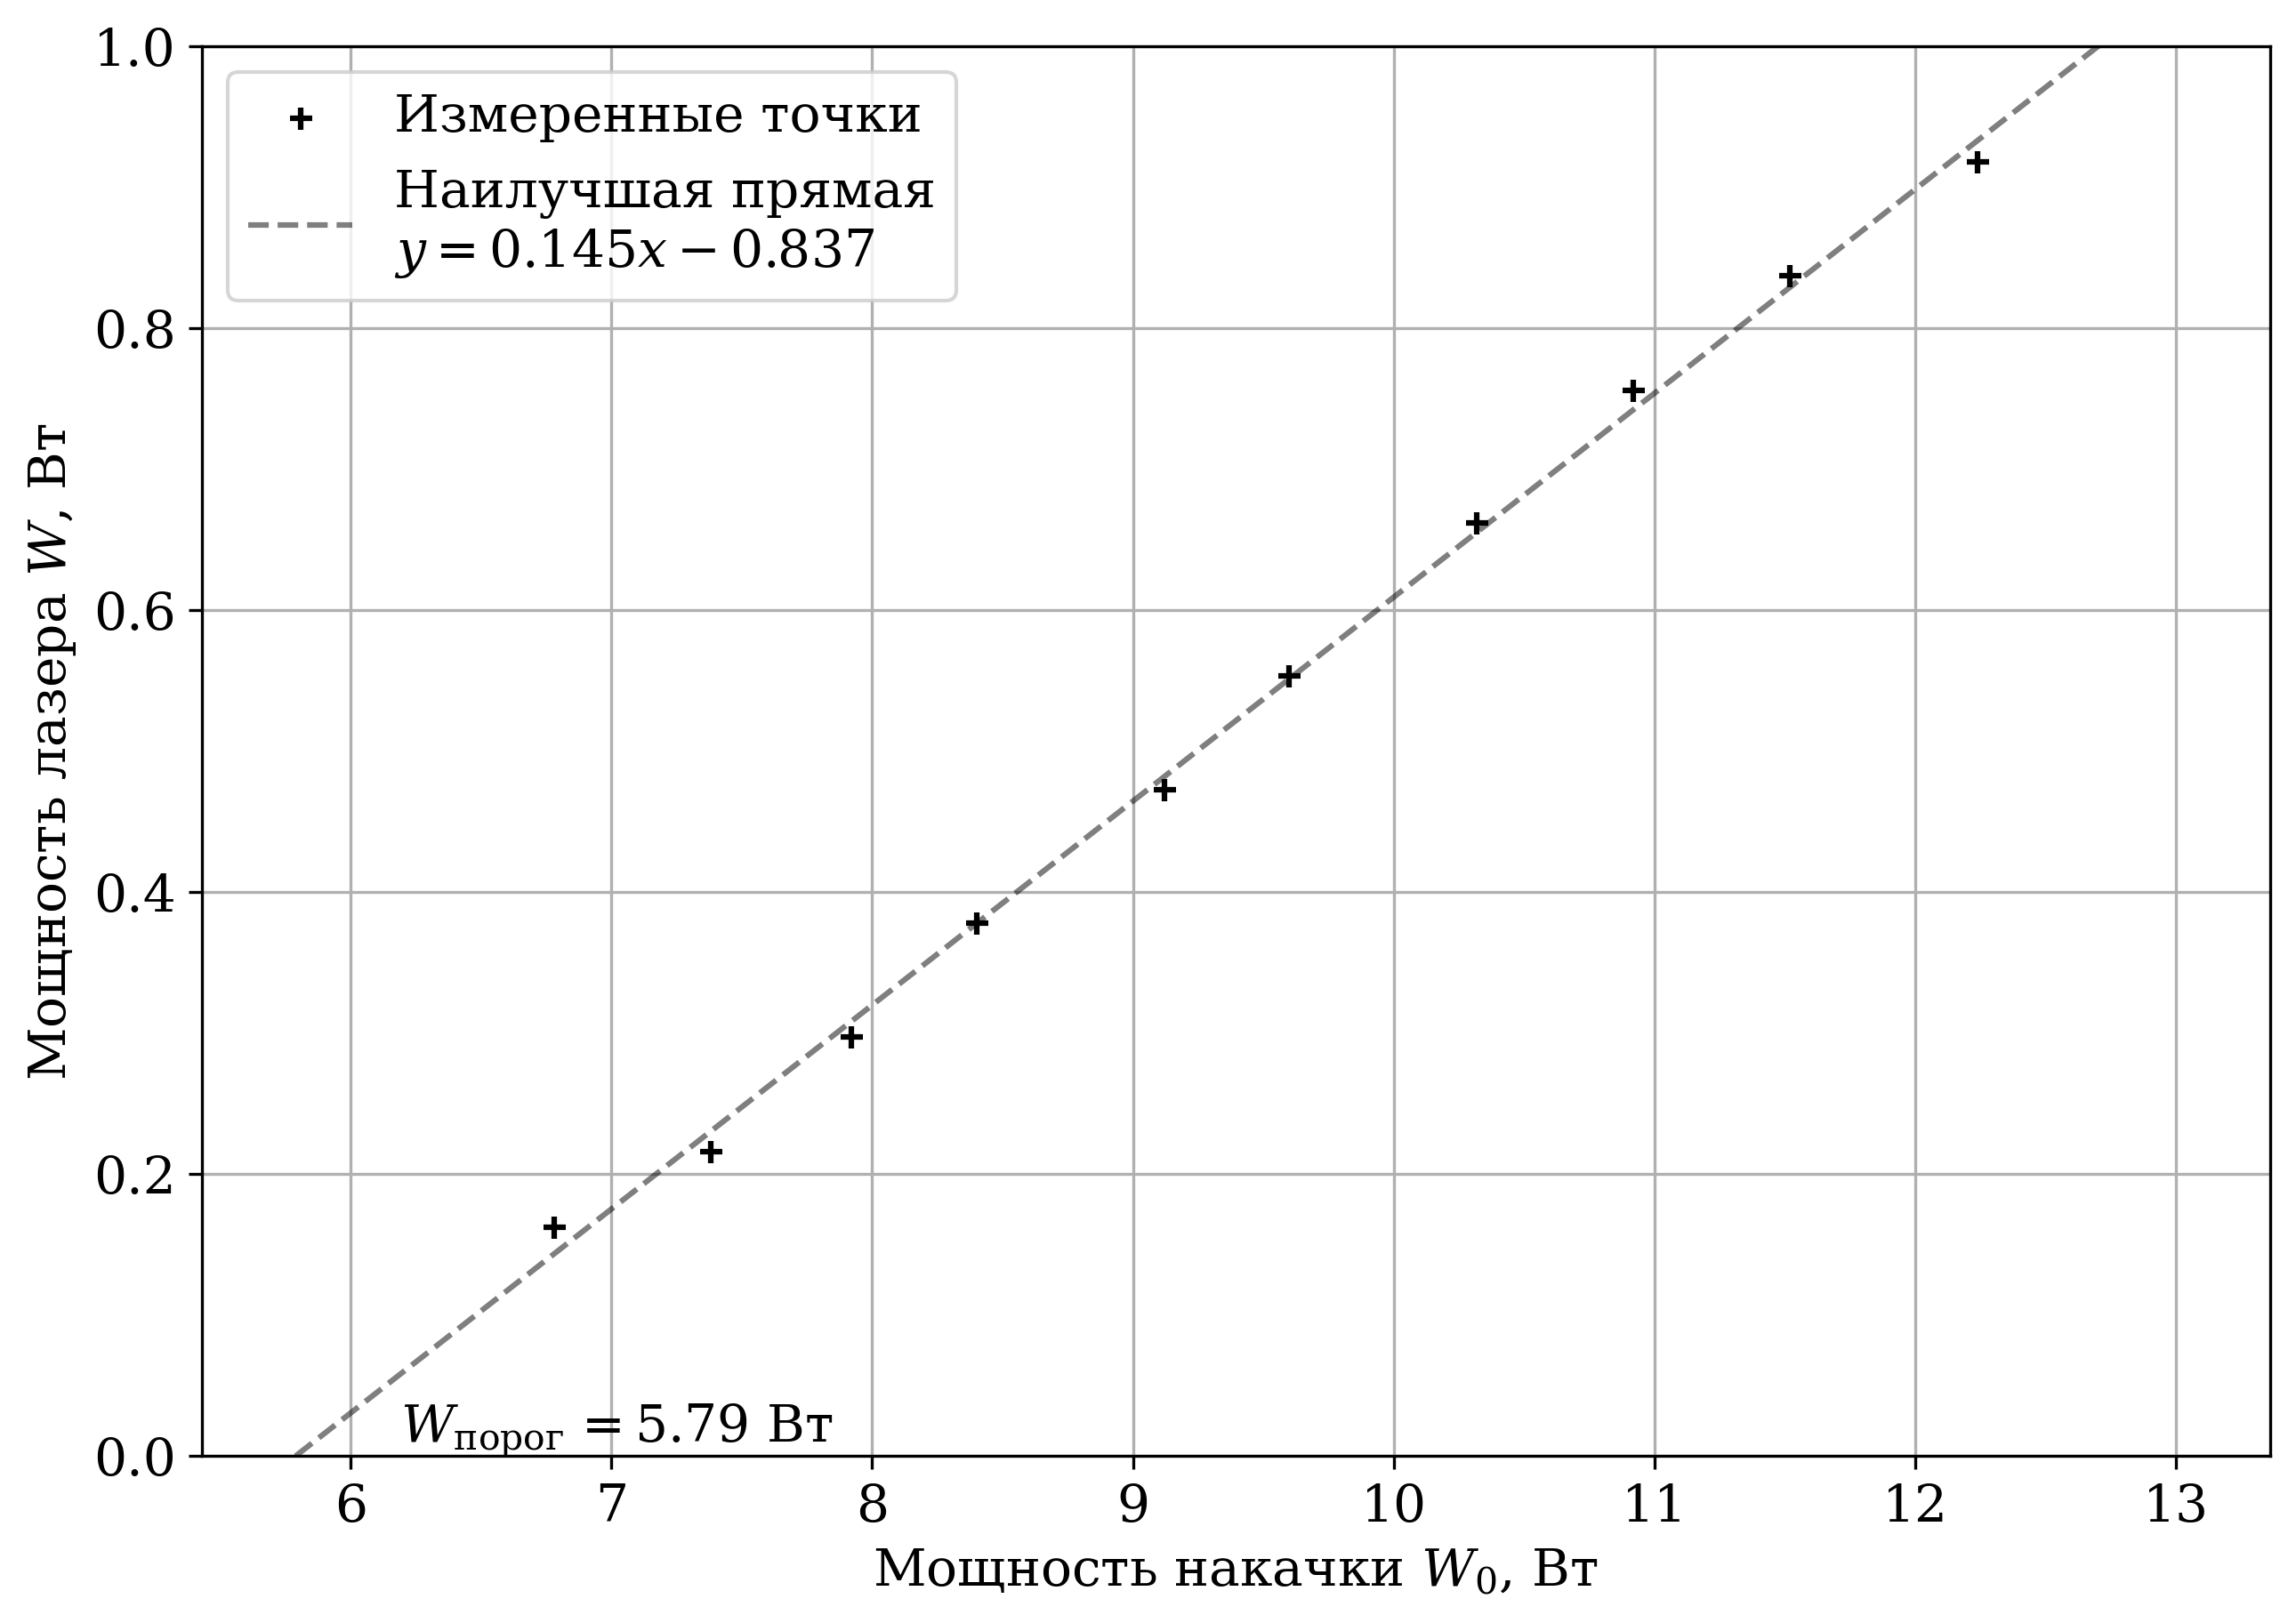

In [6]:
x, y = exp_1["W0"], exp_1["W"]

poly = Polynomial.fit(x, y, 1).convert()
print(poly)
print(np.polyfit(x, y, 1))
x_0 = poly.roots()
x_lin = np.linspace(x_0, 13, 10)

plt.scatter(x, y, color="black", marker="+", label="Измеренные точки")
line_text = f"$y = {poly.coef[1]:.3f} x {+poly.coef[0]:.3f}$"
plt.plot(x_lin, poly(x_lin), color="black", ls="--", alpha=0.5, label=("Наилучшая прямая\n"+line_text))

plt.xlabel("Мощность накачки $W_0$, Вт")
plt.ylabel("Мощность лазера $W$, Вт")
plt.text(x_0 + 0.4, 0.01, f"$W_{{\operatorname{{порог}}}} = {x_0[0]:.2f}$ Вт")
plt.ylim(0, 1)
plt.legend()

plt.savefig("plot_1.pdf")
plt.show()

In [7]:
exp_2 = pd.read_csv("exp_2.csv")

In [31]:
def root_function(x, alpha):
    return alpha * np.sqrt(x - 1)

def relaxation_frequency(x, tau, tau_c):
    return np.sqrt((x - 1) / (tau * tau_c)) / (2 * np.pi)

(array([49.29012022]), array([[0.22454539]]))
49.290120223933044


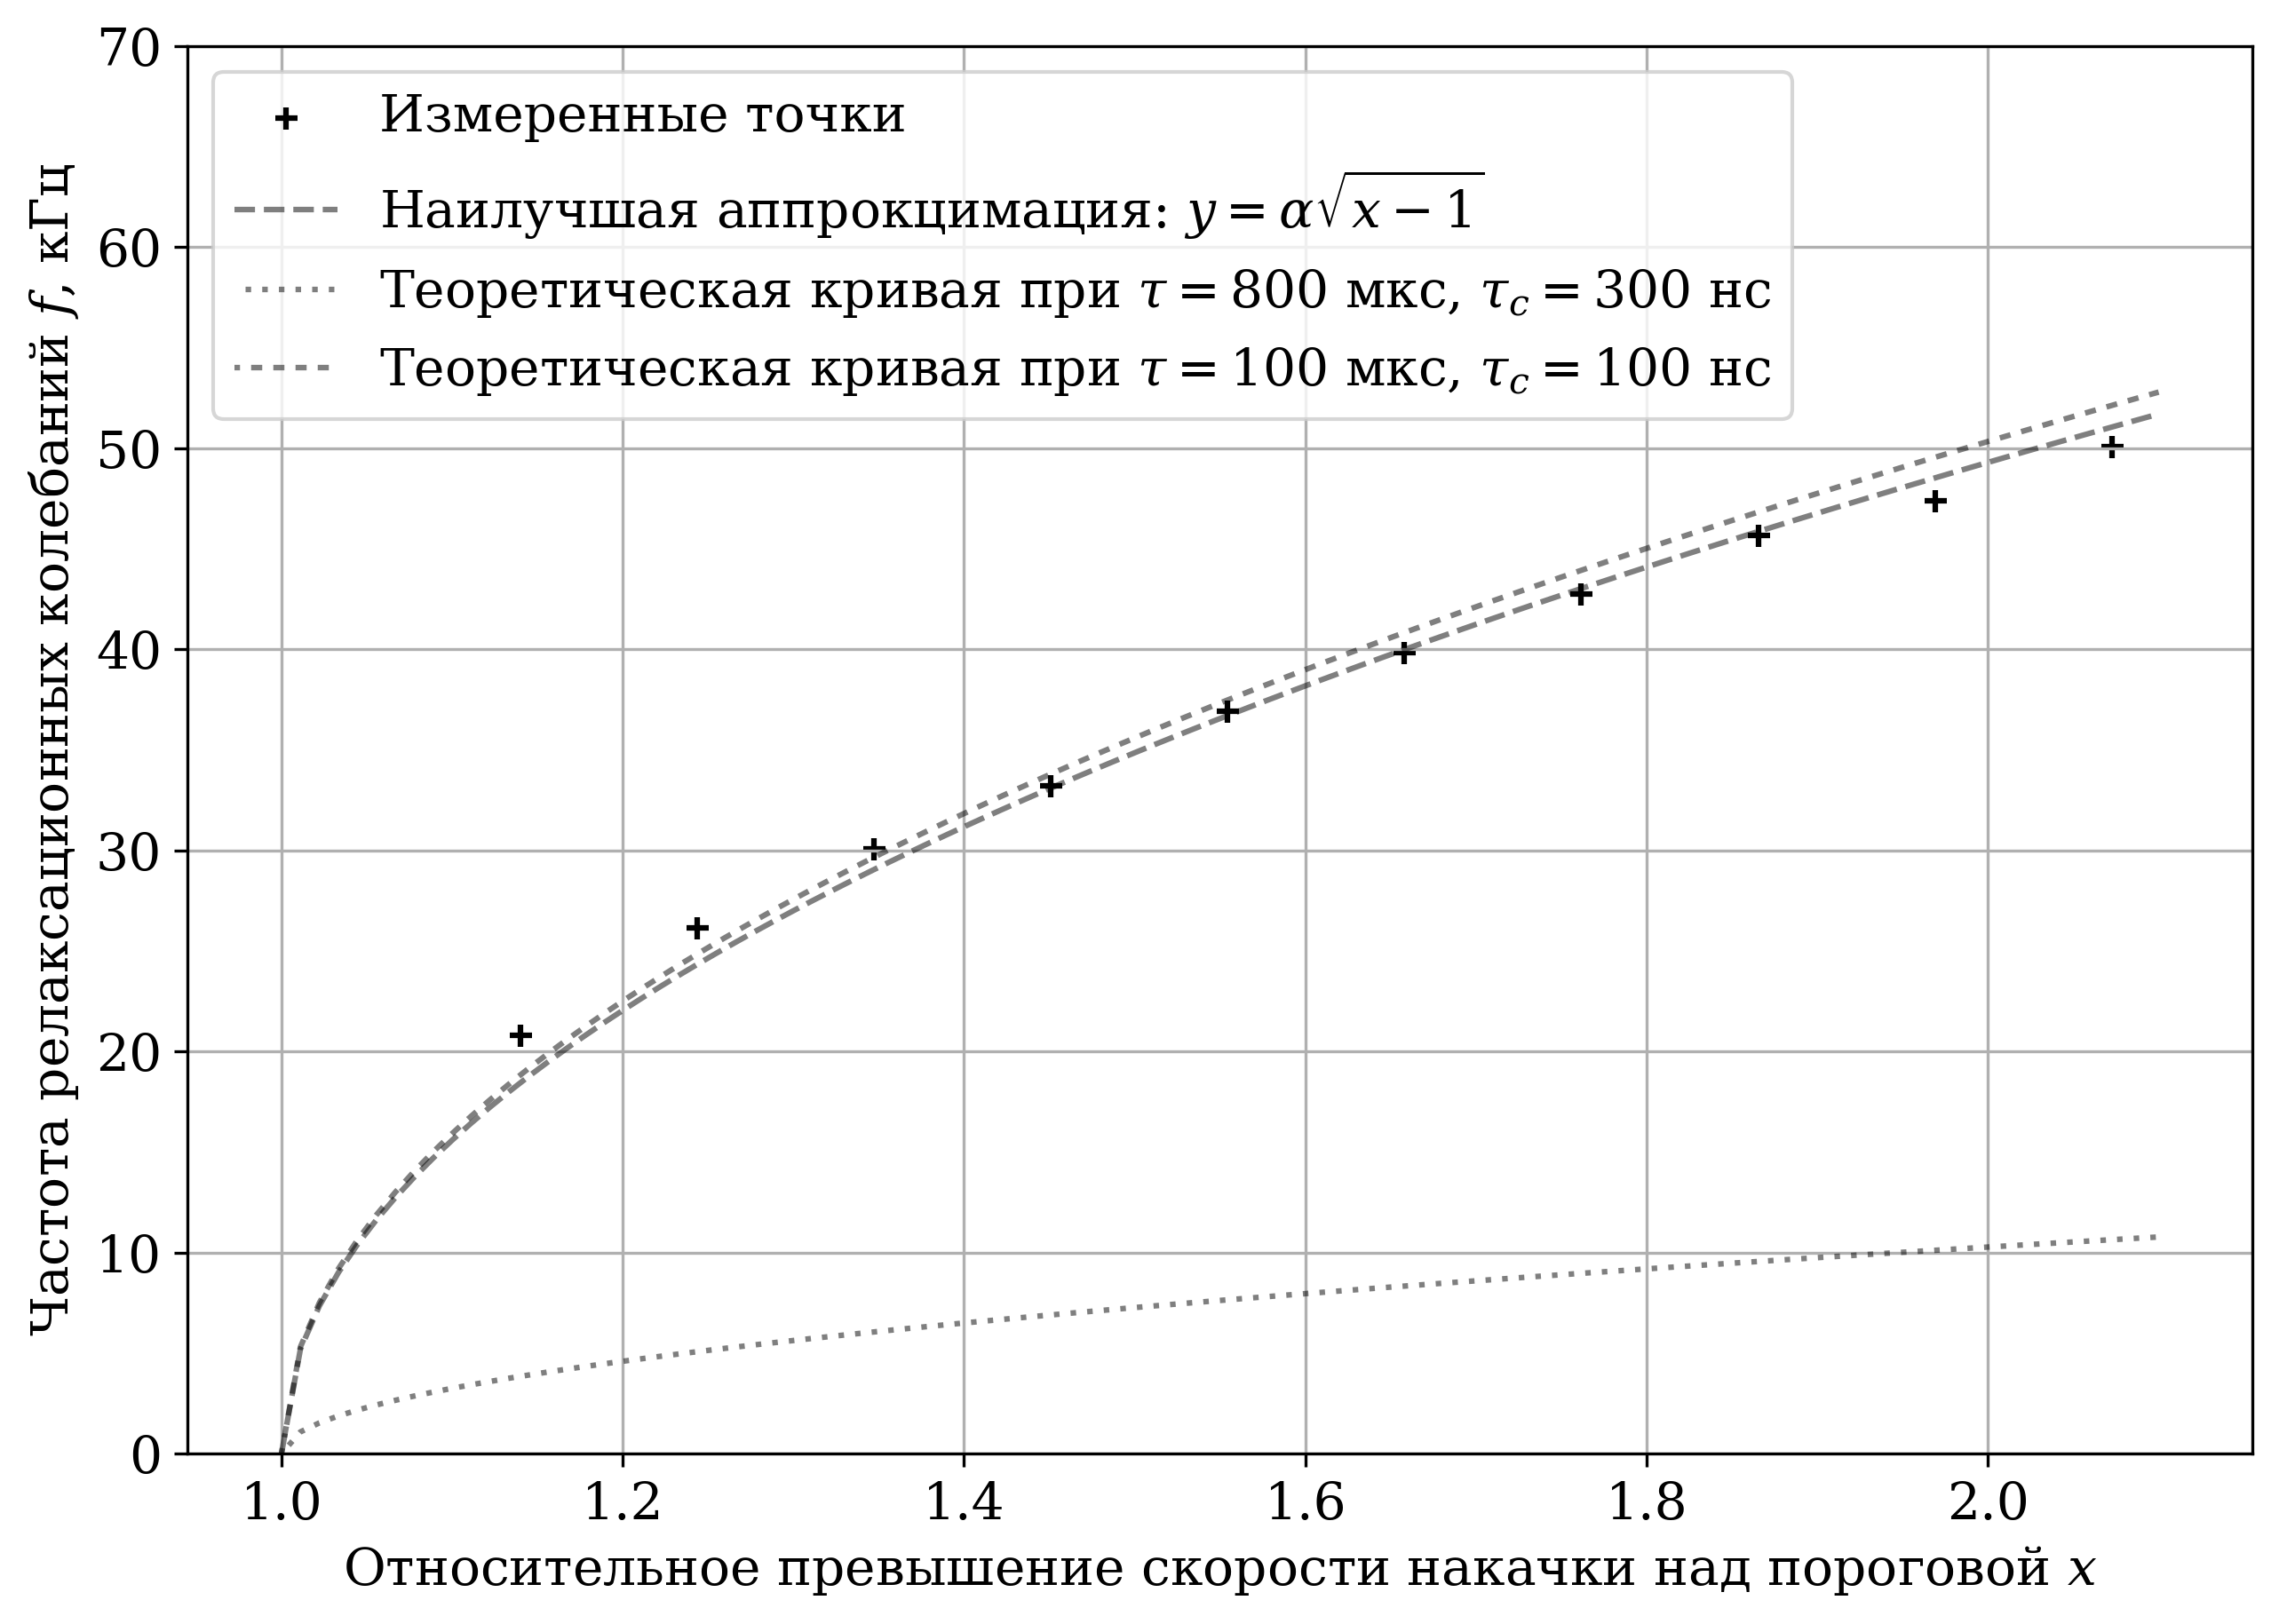

In [61]:
x, y = exp_2["x"], exp_2["f"]

params = curve_fit(root_function, x, y)
print(params)
alpha_0 = params[0][0]
print(alpha_0)
x_lin = np.linspace(1, 2.1, 100)

plt.scatter(x, y, color="black", marker="+", label="Измеренные точки")
# line_text = f"$y = {poly.coef[1]:.3f} x {+poly.coef[0]:.3f}$"
plt.plot(x_lin, root_function(x_lin, alpha_0), color="black", ls="--", alpha=0.5, label="Наилучшая аппрокцимация: " + r"$y = \alpha \sqrt{x - 1}$")
tau, tau_c = 800e-6, 300e-9
plt.plot(x_lin, relaxation_frequency(x_lin, tau, tau_c) * 1e-3, color="black", ls=(1, (1, 2)), alpha=0.5,
         label=f"Теоретическая кривая при $\\tau = {tau * 1e6:.0f}$ мкс, $\\tau_c = {tau_c * 1e9:.0f}$ нс")
tau, tau_c = 100e-6, 100e-9
plt.plot(x_lin, relaxation_frequency(x_lin, tau, tau_c) * 1e-3, color="black", ls=(1, (2, 2)), alpha=0.5,
         label=f"Теоретическая кривая при $\\tau = {tau * 1e6:.0f}$ мкс, $\\tau_c = {tau_c * 1e9:.0f}$ нс")

plt.xlabel("Относительное превышение скорости накачки над пороговой $x$")
plt.ylabel("Частота релаксационных колебаний $f$, кГц")
# plt.text(x_0 + 0.4, 0.01, f"$W_{{\operatorname{{порог}}}} = {x_0[0]:.2f}$ Вт")
plt.ylim(0, 70)
plt.legend()

plt.savefig("plot_2.pdf")
plt.show()

In [50]:
exp_3 = pd.read_csv("exp_3.csv")

(array([50.91567092]), array([[1.98517264]]))
50.91567091875596


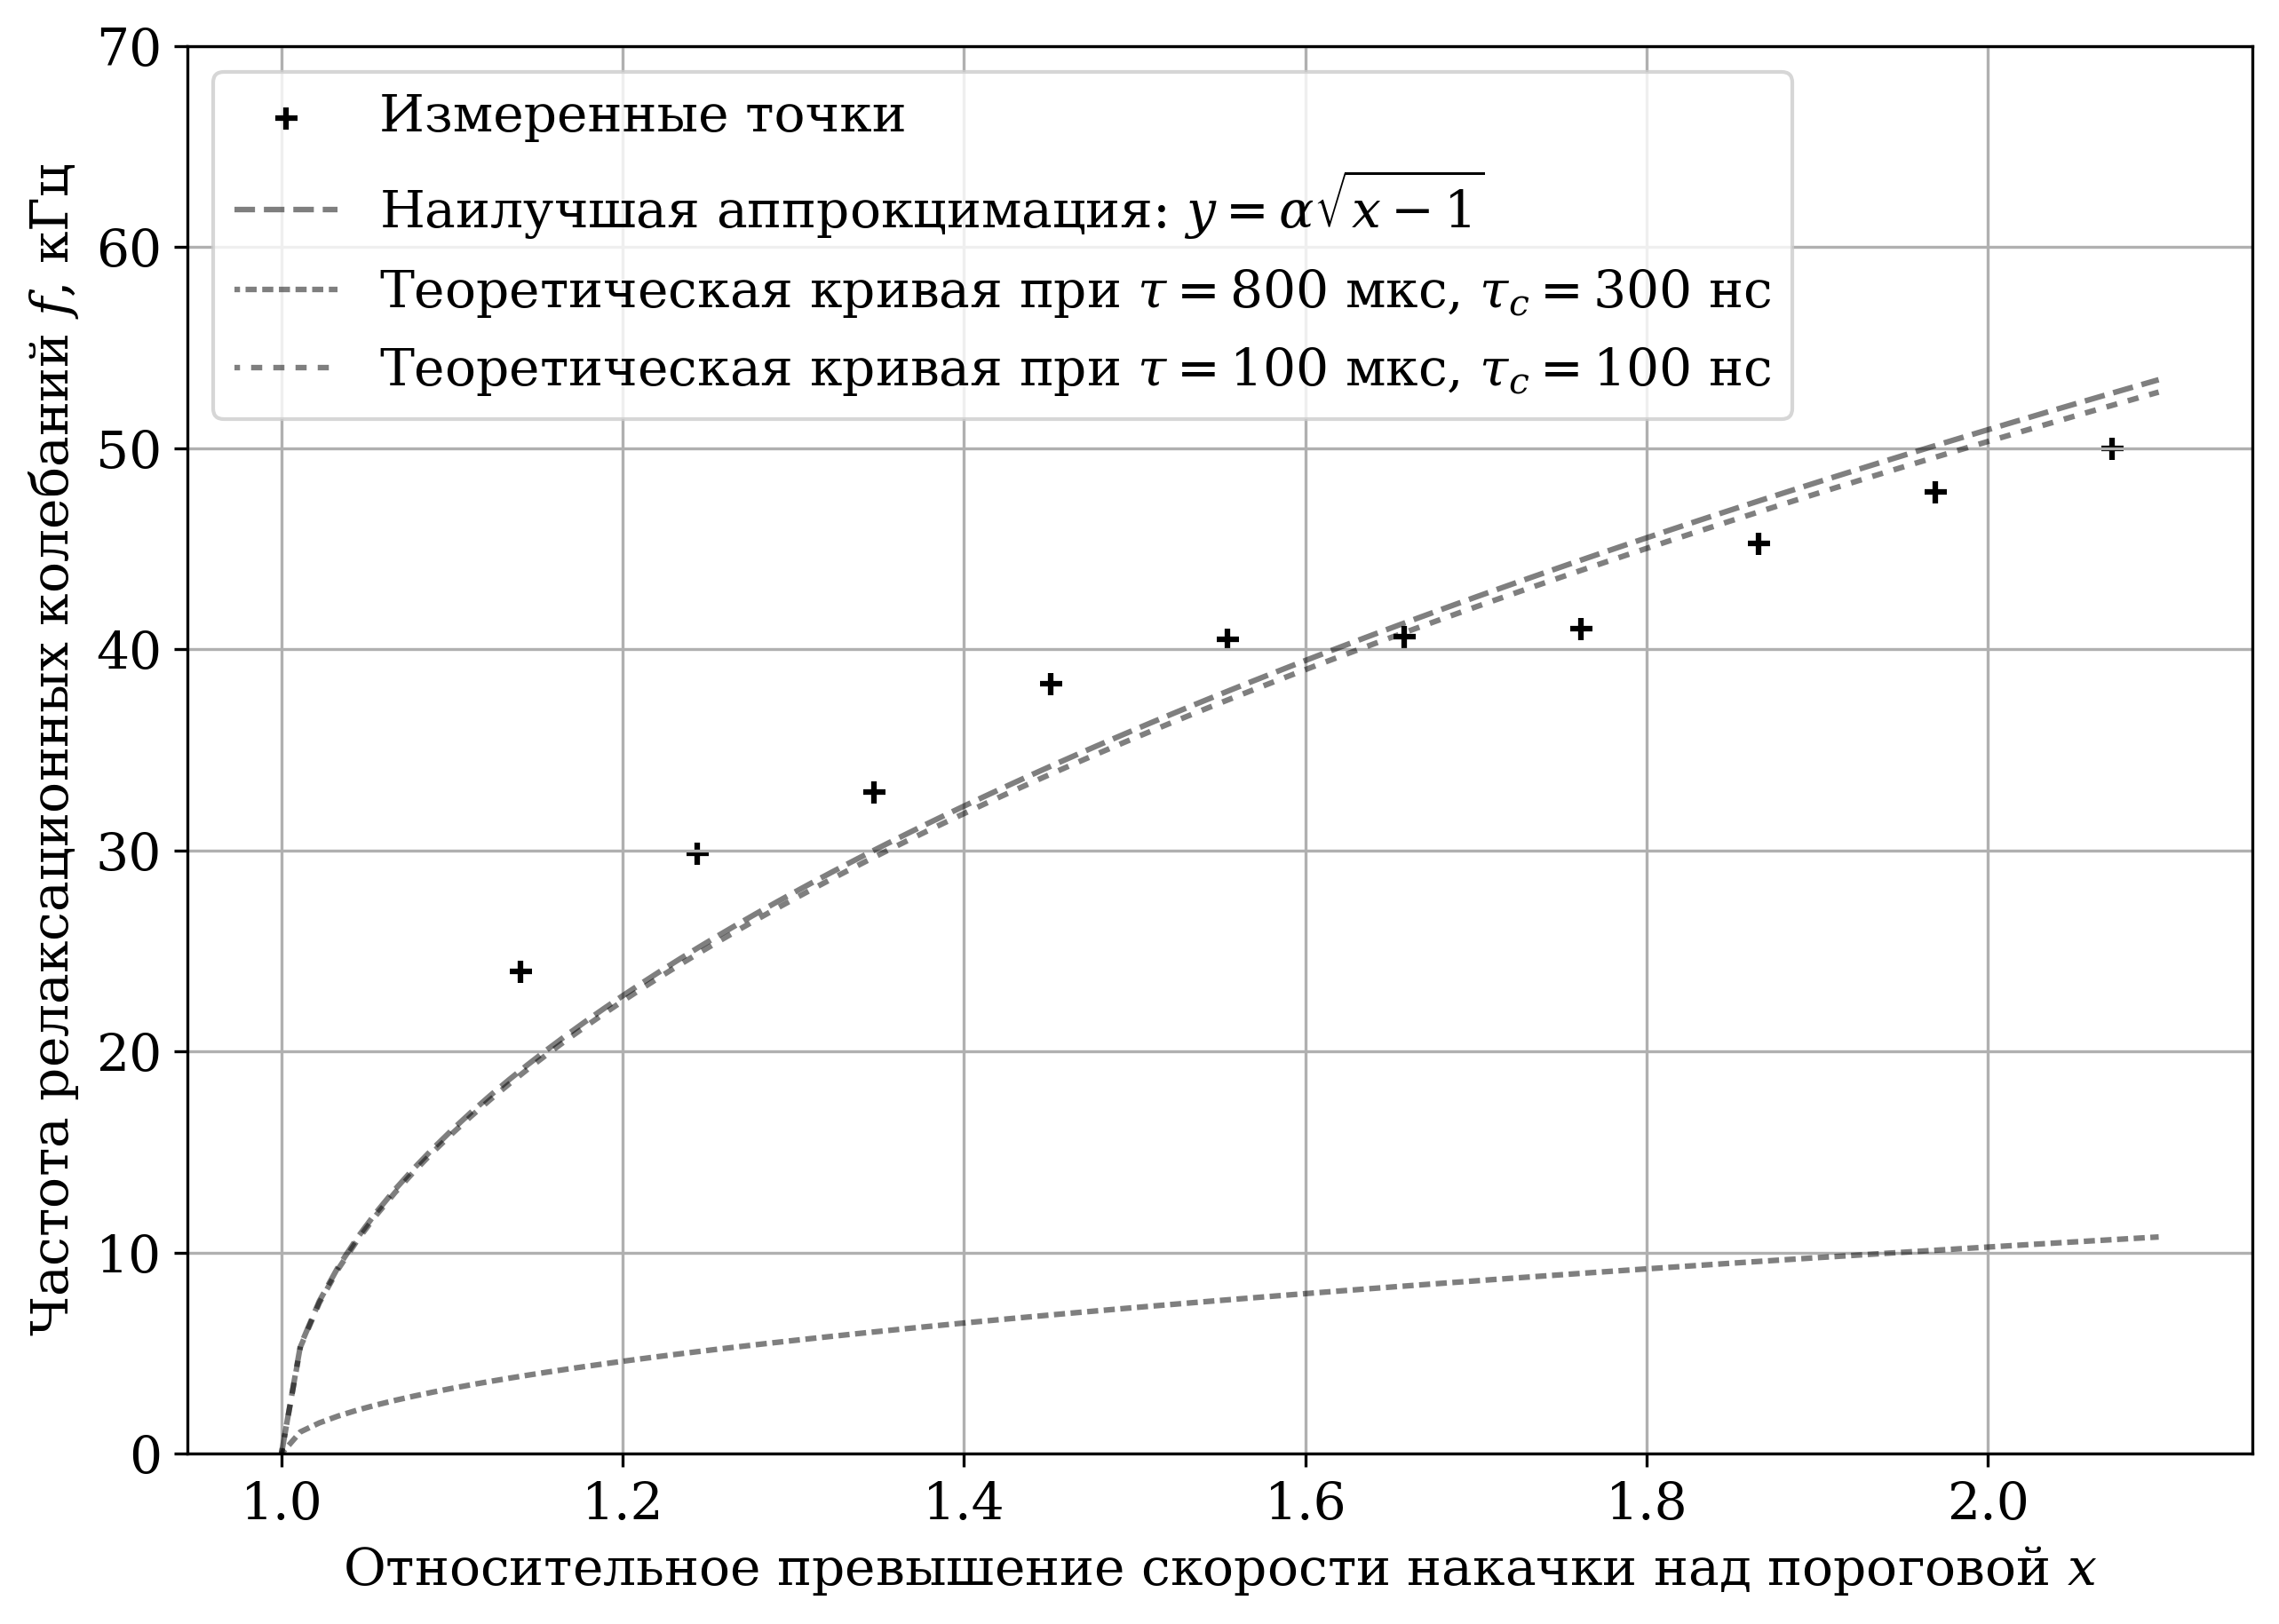

In [63]:
x, y = exp_3["x"], exp_3["f"]

params = curve_fit(root_function, x, y)
print(params)
alpha_0 = params[0][0]
print(alpha_0)
x_lin = np.linspace(1, 2.1, 100)

plt.scatter(x, y, color="black", marker="+", label="Измеренные точки")
# line_text = f"$y = {poly.coef[1]:.3f} x {+poly.coef[0]:.3f}$"
plt.plot(x_lin, root_function(x_lin, alpha_0), color="black", ls="--", alpha=0.5, label="Наилучшая аппрокцимация: " + r"$y = \alpha \sqrt{x - 1}$")
tau, tau_c = 800e-6, 300e-9
plt.plot(x_lin, relaxation_frequency(x_lin, tau, tau_c) * 1e-3, color="black", ls=(1, (2, 1)), alpha=0.5,
         label=f"Теоретическая кривая при $\\tau = {tau * 1e6:.0f}$ мкс, $\\tau_c = {tau_c * 1e9:.0f}$ нс")
tau, tau_c = 100e-6, 100e-9
plt.plot(x_lin, relaxation_frequency(x_lin, tau, tau_c) * 1e-3, color="black", ls=(1, (2, 2)), alpha=0.5,
         label=f"Теоретическая кривая при $\\tau = {tau * 1e6:.0f}$ мкс, $\\tau_c = {tau_c * 1e9:.0f}$ нс")


plt.xlabel("Относительное превышение скорости накачки над пороговой $x$")
plt.ylabel("Частота релаксационных колебаний $f$, кГц")
# plt.text(x_0 + 0.4, 0.01, f"$W_{{\operatorname{{порог}}}} = {x_0[0]:.2f}$ Вт")
plt.ylim(0, 70)
plt.legend()

plt.savefig("plot_3.pdf")
plt.show()